<a href="https://colab.research.google.com/github/JUD210/exploration_06/blob/main/ipynb_files/ex06_n9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# Diffusers를 설치

!pip install --upgrade -qq git+https://github.com/huggingface/diffusers.git transformers accelerate

  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done


In [4]:
!git config --global credential.helper store

In [5]:
!huggingface-cli login


    _|    _|  _|    _|    _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|_|_|_|    _|_|      _|_|_|  _|_|_|_|
    _|    _|  _|    _|  _|        _|          _|    _|_|    _|  _|            _|        _|    _|  _|        _|
    _|_|_|_|  _|    _|  _|  _|_|  _|  _|_|    _|    _|  _|  _|  _|  _|_|      _|_|_|    _|_|_|_|  _|        _|_|_|
    _|    _|  _|    _|  _|    _|  _|    _|    _|    _|    _|_|  _|    _|      _|        _|    _|  _|        _|
    _|    _|    _|_|      _|_|_|    _|_|_|  _|_|_|  _|      _|    _|_|_|      _|        _|    _|    _|_|_|  _|_|_|_|

    A token is already saved on your machine. Run `huggingface-cli whoami` to get more information or `huggingface-cli logout` if you want to log out.
    Setting a new token will erase the existing one.
    To log in, `huggingface_hub` requires a token generated from https://huggingface.co/settings/tokens .
Enter your token (input will not be visible): 
Add token as git credential? (Y/n) y
Token is valid (permission: fineG

In [ ]:
# Text-to-Image Generation 파이프라인을 불러오기
import gc

import torch
from diffusers import DiffusionPipeline, DPMSolverMultistepScheduler

gc.collect()       # Collect garbage
torch.cuda.empty_cache()  # Clear CUDA cache

device = "cuda"

# 파이프라인 불러오기
# repo_id = "stabilityai/stable-diffusion-2-base"
repo_id = "stabilityai/stable-diffusion-3.5-medium"

# After loading the pipeline
pipe = DiffusionPipeline.from_pretrained(repo_id, torch_dtype=torch.float16)
pipe.scheduler = DPMSolverMultistepScheduler.from_config(pipe.scheduler.config)
pipe = pipe.to(device)

# Enable attention slicing
pipe.enable_attention_slicing()

Loading pipeline components...:   0%|          | 0/9 [00:00<?, ?it/s]

Loading checkpoint shards:   0%|          | 0/2 [00:00<?, ?it/s]

In [ ]:
# 이미지 저장 폴더 만들기
# import os
# os.mkdir("/content/aiffel/diffusers")    # diffusers 폴더를 이미 만들었다면 주석 처리해 주세요.

# Text-to-Image Generation

## 하나의 이미지 생성하기

In [ ]:
prompt = """
prompt
1girl, long black hair, blue eyes, wearing plain white shirt, denim shorts, cute, beautiful, city, absurdres, high res, ultrasharp, 8K, masterpiece, looking at viewer

negative label
verybadimagenegative_v1.3, ng_deepnegative_v1_75t, (ugly face:0.8),cross-eyed,sketches, (worst quality:2), (low quality:2), (normal quality:2), lowres, normal quality, ((monochrome)), ((grayscale)), skin spots, acnes, skin blemishes

bad anatomy, DeepNegative, facing away, tilted head, {Multiple people}, lowres, bad anatomy, bad hands, text, error, missing fingers, extra digit, fewer digits, cropped, worstquality, low quality, normal quality, jpegartifacts, signature, watermark, usern
"""

In [ ]:
!pwd

/content


Token indices sequence length is longer than the specified maximum sequence length for this model (178 > 77). Running this sequence through the model will result in indexing errors
The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['filtered , professional portrait , gregory crewdson style , trending on instagram , intricately detailed , high resolution , subtle bokeh effect in the background , ( attention to texture and realism ) negative prompt : ( low resolution ), ( blurry ), ( artifacts ), ( overexposed ), ( underexposed ), ( unnatural colors ), ( excessive makeup ), ( cartoonish ), ( poorly drawn ), ( grainy ), ( distracting background elements ), ( low quality ), ( mutated features ), ( distorted anatomy )']


  0%|          | 0/50 [00:00<?, ?it/s]

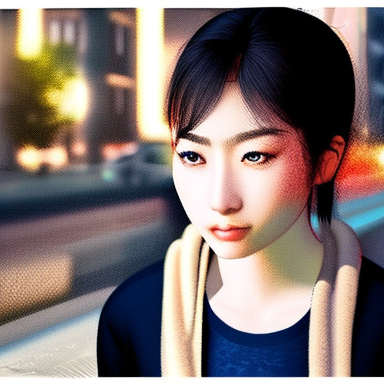

In [ ]:
# 입력한 프롬프트를 사용하여 이미지 생성
# For Text-to-Image Generation
image = pipe(
    prompt,
    height=512,  # default
    width=512,   # default
    num_inference_steps=50, # default
    guidance_scale=7.5 # default
).images[0]

# 이미지 저장
image.save("/content/aiffel/diffusers/image.png")


# 이미지 출력
image

In [ ]:
# After generating and saving images
del image  # Delete variables
gc.collect()       # Collect garbage
torch.cuda.empty_cache()  # Clear CUDA cache

## 여러 개의 이미지 생성하기
* 이미지 처리를 해주는 파이썬 라이브러리인 pillow를 사용

In [ ]:
# 파이썬 이미지 처리 라이브러리 pillow 불러오기
from PIL import Image

# 틀 만들기
def image_grid(imgs, rows, cols):
    assert len(imgs) == rows * cols

    w, h = imgs[0].size
    grid = Image.new('RGB', size=(cols * w, rows * h))
    grid_w, grid_h = grid.size

    for i, img in enumerate(imgs):
        grid.paste(img, box = (i%cols * w, i // cols * h))
    return grid

The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['filtered , professional portrait , gregory crewdson style , trending on instagram , intricately detailed , high resolution , subtle bokeh effect in the background , ( attention to texture and realism ) negative prompt : ( low resolution ), ( blurry ), ( artifacts ), ( overexposed ), ( underexposed ), ( unnatural colors ), ( excessive makeup ), ( cartoonish ), ( poorly drawn ), ( grainy ), ( distracting background elements ), ( low quality ), ( mutated features ), ( distorted anatomy )', 'filtered , professional portrait , gregory crewdson style , trending on instagram , intricately detailed , high resolution , subtle bokeh effect in the background , ( attention to texture and realism ) negative prompt : ( low resolution ), ( blurry ), ( artifacts ), ( overexposed ), ( underexposed ), ( unnatural colors ), ( excessive makeup ), ( cartoonish ), ( poorly drawn ), ( grainy ), ( distract

  0%|          | 0/50 [00:00<?, ?it/s]

The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['filtered , professional portrait , gregory crewdson style , trending on instagram , intricately detailed , high resolution , subtle bokeh effect in the background , ( attention to texture and realism ) negative prompt : ( low resolution ), ( blurry ), ( artifacts ), ( overexposed ), ( underexposed ), ( unnatural colors ), ( excessive makeup ), ( cartoonish ), ( poorly drawn ), ( grainy ), ( distracting background elements ), ( low quality ), ( mutated features ), ( distorted anatomy )']


  0%|          | 0/50 [00:00<?, ?it/s]

The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['filtered , professional portrait , gregory crewdson style , trending on instagram , intricately detailed , high resolution , subtle bokeh effect in the background , ( attention to texture and realism ) negative prompt : ( low resolution ), ( blurry ), ( artifacts ), ( overexposed ), ( underexposed ), ( unnatural colors ), ( excessive makeup ), ( cartoonish ), ( poorly drawn ), ( grainy ), ( distracting background elements ), ( low quality ), ( mutated features ), ( distorted anatomy )']


  0%|          | 0/50 [00:00<?, ?it/s]

The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['filtered , professional portrait , gregory crewdson style , trending on instagram , intricately detailed , high resolution , subtle bokeh effect in the background , ( attention to texture and realism ) negative prompt : ( low resolution ), ( blurry ), ( artifacts ), ( overexposed ), ( underexposed ), ( unnatural colors ), ( excessive makeup ), ( cartoonish ), ( poorly drawn ), ( grainy ), ( distracting background elements ), ( low quality ), ( mutated features ), ( distorted anatomy )']


  0%|          | 0/50 [00:00<?, ?it/s]

The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['filtered , professional portrait , gregory crewdson style , trending on instagram , intricately detailed , high resolution , subtle bokeh effect in the background , ( attention to texture and realism ) negative prompt : ( low resolution ), ( blurry ), ( artifacts ), ( overexposed ), ( underexposed ), ( unnatural colors ), ( excessive makeup ), ( cartoonish ), ( poorly drawn ), ( grainy ), ( distracting background elements ), ( low quality ), ( mutated features ), ( distorted anatomy )']


  0%|          | 0/50 [00:00<?, ?it/s]

The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['filtered , professional portrait , gregory crewdson style , trending on instagram , intricately detailed , high resolution , subtle bokeh effect in the background , ( attention to texture and realism ) negative prompt : ( low resolution ), ( blurry ), ( artifacts ), ( overexposed ), ( underexposed ), ( unnatural colors ), ( excessive makeup ), ( cartoonish ), ( poorly drawn ), ( grainy ), ( distracting background elements ), ( low quality ), ( mutated features ), ( distorted anatomy )']


  0%|          | 0/50 [00:00<?, ?it/s]

The following part of your input was truncated because CLIP can only handle sequences up to 77 tokens: ['filtered , professional portrait , gregory crewdson style , trending on instagram , intricately detailed , high resolution , subtle bokeh effect in the background , ( attention to texture and realism ) negative prompt : ( low resolution ), ( blurry ), ( artifacts ), ( overexposed ), ( underexposed ), ( unnatural colors ), ( excessive makeup ), ( cartoonish ), ( poorly drawn ), ( grainy ), ( distracting background elements ), ( low quality ), ( mutated features ), ( distorted anatomy )']


  0%|          | 0/50 [00:00<?, ?it/s]

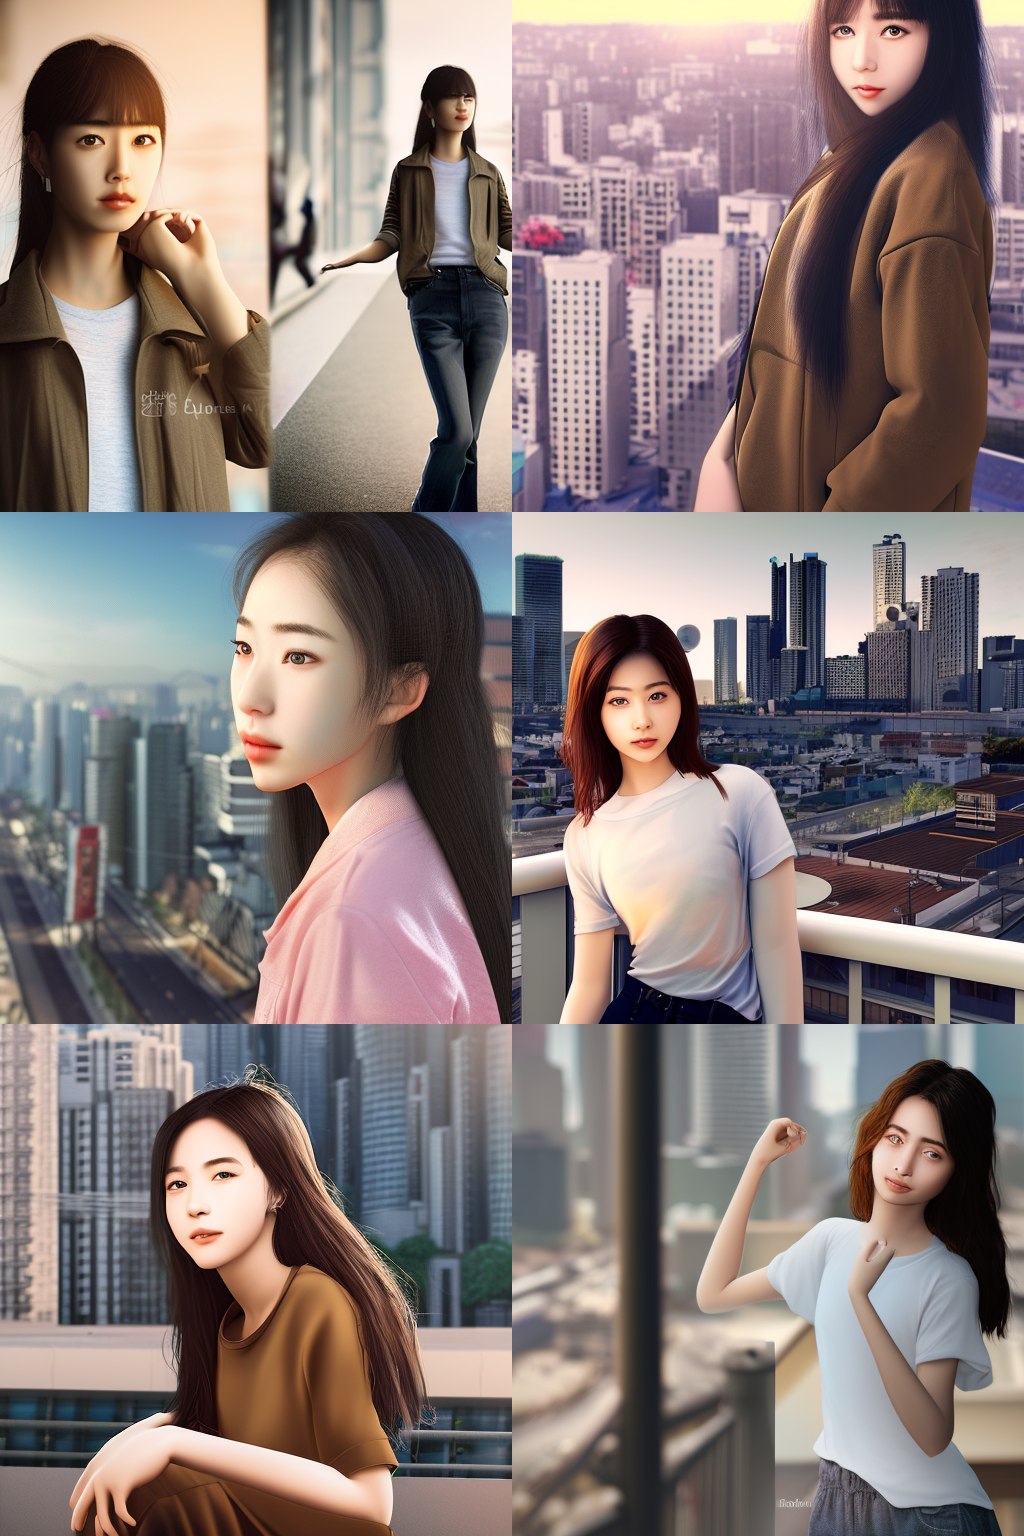

In [ ]:
# Instead of generating 6 images at once
num_images = 6
prompt_list = [prompt] * num_images
images = pipe(prompt_list).images

# Generate images one by one
images = []
for _ in range(num_images):
    img = pipe(prompt).images[0]
    images.append(img)
    img.save(f"/content/aiffel/diffusers/image1_{len(images)}.png")

grid = image_grid(images, rows= 3, cols= 2)
grid

In [ ]:
# After generating and saving images
del images  # Delete variables
gc.collect()       # Collect garbage
torch.cuda.empty_cache()  # Clear CUDA cache

# Image-to-Image Generation
* 프롬프트뿐 아니라 이미지를 입력으로 넣으면 다른 이미지로 변형시켜 주는 기능
* Diffusers에는 이 기능이 포함된 파이프라인을 이미 만들어 두었기 때문에 파이프라인을 불러오기만 하면 쉽게 모델을 사용할 수 있음

In [ ]:
# Image-to-Image Generation 파이프라인 불러오기
from diffusers import StableDiffusionImg2ImgPipeline

device = "cuda"
model_path = "CompVis/stable-diffusion-v1-4"

# After loading the Image-to-Image pipeline
pipe = StableDiffusionImg2ImgPipeline.from_pretrained(
    model_path,
    torch_dtype=torch.float16,
)
pipe = pipe.to(device)

# Enable attention slicing
pipe.enable_attention_slicing()

model_index.json:   0%|          | 0.00/541 [00:00<?, ?B/s]

Fetching 16 files:   0%|          | 0/16 [00:00<?, ?it/s]

model.safetensors:   0%|          | 0.00/492M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/1.22G [00:00<?, ?B/s]

text_encoder/config.json:   0%|          | 0.00/592 [00:00<?, ?B/s]

scheduler/scheduler_config.json:   0%|          | 0.00/313 [00:00<?, ?B/s]

tokenizer/merges.txt:   0%|          | 0.00/525k [00:00<?, ?B/s]

(…)ature_extractor/preprocessor_config.json:   0%|          | 0.00/342 [00:00<?, ?B/s]

safety_checker/config.json:   0%|          | 0.00/4.56k [00:00<?, ?B/s]

(…)kpoints/scheduler_config-checkpoint.json:   0%|          | 0.00/209 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/3.44G [00:00<?, ?B/s]

tokenizer/special_tokens_map.json:   0%|          | 0.00/472 [00:00<?, ?B/s]

unet/config.json:   0%|          | 0.00/743 [00:00<?, ?B/s]

tokenizer/vocab.json:   0%|          | 0.00/1.06M [00:00<?, ?B/s]

tokenizer/tokenizer_config.json:   0%|          | 0.00/806 [00:00<?, ?B/s]

vae/config.json:   0%|          | 0.00/551 [00:00<?, ?B/s]

diffusion_pytorch_model.safetensors:   0%|          | 0.00/335M [00:00<?, ?B/s]

Loading pipeline components...:   0%|          | 0/7 [00:00<?, ?it/s]

## 하나의 이미지 생성하기

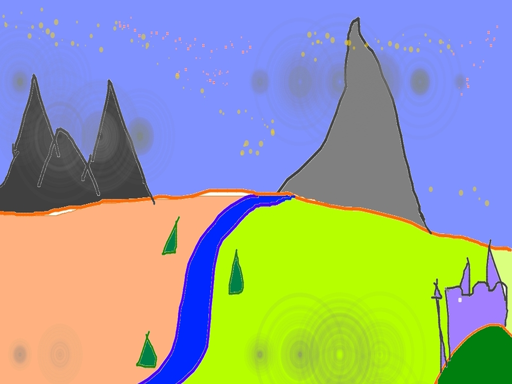

In [ ]:
# 허깅페이스에서 제공하는 기본 이미지를 사용

import requests
from io import BytesIO

url = "https://raw.githubusercontent.com/CompVis/stable-diffusion/main/assets/stable-samples/img2img/sketch-mountains-input.jpg"

# url 호출하기
response = requests.get(url)

# 이미지 열기(인터넷에 있는 이미지를 가져온 경우)
init_img = Image.open(BytesIO(response.content)).convert("RGB")  # 이미지를 메모리로 읽어와서 RGB로 변경합니다.
init_img = init_img.resize((512, 384))  # 이미지의 크기를 조절합니다.
init_img

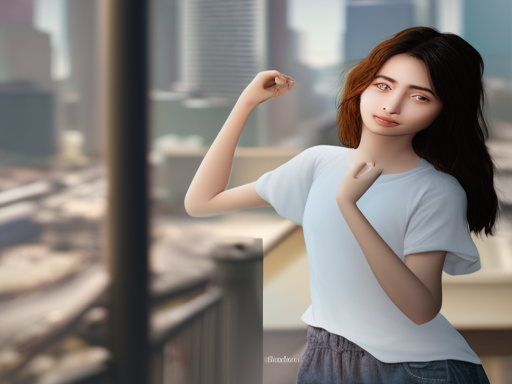

In [ ]:
# 이미지 열기(디렉토리에 있는 이미지를 읽어오는 경우)
init_img = Image.open("/content/aiffel/diffusers/image1_6.png", mode = 'r')
init_img = init_img.resize((512, 384))
init_img

In [ ]:
# 불러온 이미지를 내가 원하는 스타일로 변경할 수 있도록 프롬프트를 작성
prompt = "A fantasy landscape, trending on artstation"

  0%|          | 0/37 [00:00<?, ?it/s]

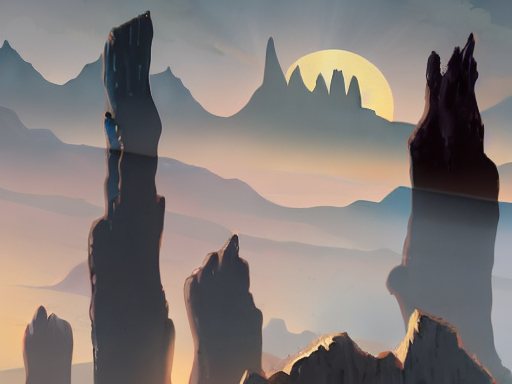

In [ ]:
generator = torch.Generator(device=device).manual_seed(1024)   # 모델을 사용할 때마다 동일한 이미지를 생성하기 위해 seed를 설정합니다.

images = pipe(prompt=prompt, image=init_img, strength=0.75, guidance_scale=7.5).images
images[0].save("/content/aiffel/diffusers/fantasy_landscape.png")
images[0]


## 여러 개의 이미지 생성하기

/usr/local/lib/python3.10/dist-packages/diffusers/pipelines/stable_diffusion/pipeline_stable_diffusion_img2img.py:768: FutureWarning: You have passed 2 text prompts (`prompt`), but only 1 initial images (`image`). Initial images are now duplicating to match the number of text prompts. Note that this behavior is deprecated and will be removed in a version 1.0.0. Please make sure to update your script to pass as many initial images as text prompts to suppress this warning.
  deprecate("len(prompt) != len(image)", "1.0.0", deprecation_message, standard_warn=False)


  0%|          | 0/45 [00:00<?, ?it/s]

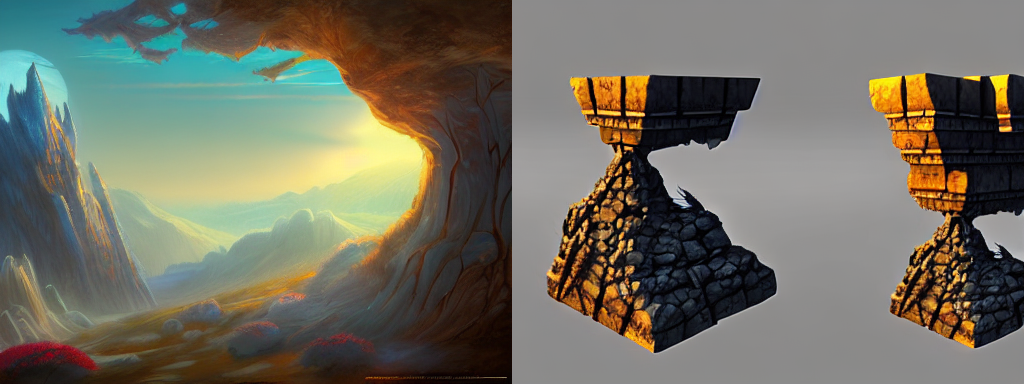

In [ ]:
num_images = 2

# 프롬프트 입력
prompt = ['A fantasy landscape, trending on artstation'] * num_images

# 이미지 생성
generator = torch.Generator(device=device).manual_seed(1024)
images = pipe(prompt=prompt, image=init_img, strength=0.9, guidance_scale=13.5, num_inference_steps=50, generator=generator).images
images

# 이미지 출력
grid = image_grid(images, rows=1, cols=2)
grid

In [ ]:
# After generating and saving images
del images  # Delete variables
gc.collect()       # Collect garbage
torch.cuda.empty_cache()  # Clear CUDA cache